In [9]:
filename = './API/kakaoAPI.txt'
with open(filename) as f:
    api_key = f.read()

In [12]:
len(api_key2)

66

In [3]:
import requests
from urllib.parse import quote
import json

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
from shapely.geometry import Polygon
%matplotlib inline
import matplotlib.font_manager
import re

# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [13]:
df = pd.read_csv('./datos_project/12_21_schoolzone.csv', encoding='cp949')

In [14]:
df.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,99210,2013060,1111016900,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,126.999607,37.588413,"{""type"":""Polygon"",""coordinates"":[[[127.002009,..."
1,99846,2013060,1129013500,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,127.035733,37.595505,"{""type"":""Polygon"",""coordinates"":[[[127.0381354..."
2,98904,2013060,1129011000,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,127.014564,37.597571,"{""type"":""Polygon"",""coordinates"":[[[127.0169658..."
3,99206,2013060,1129013900,11290003,서울특별시 성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,127.059596,37.610429,"{""type"":""Polygon"",""coordinates"":[[[127.0619982..."
4,99209,2013060,1132010500,11320001,서울특별시 도봉구1,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,127.024430,37.648129,"{""type"":""Polygon"",""coordinates"":[[[127.0268336..."


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사고다발지FID  391 non-null    int64  
 1   사고다발지ID   391 non-null    int64  
 2   법정동코드     391 non-null    int64  
 3   지점코드      391 non-null    int64  
 4   시도시군구명    391 non-null    object 
 5   지점명       391 non-null    object 
 6   발생건수      391 non-null    int64  
 7   사상자수      391 non-null    int64  
 8   사망자수      391 non-null    int64  
 9   중상자수      391 non-null    int64  
 10  경상자수      391 non-null    int64  
 11  부상신고자수    391 non-null    int64  
 12  경도        391 non-null    float64
 13  위도        391 non-null    float64
 14  다발지역폴리곤   391 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 45.9+ KB


In [17]:
# 시도시군구명, 지점명, 발생건수, 사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수, 경도, 위도 컬럼만 선택
df1 = df[['시도시군구명', '지점명', '발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도']]

In [20]:
df1.tail()

,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
386,경상북도 영천시1,경상북도 영천시 망정동(포은초교 부근),2,2,0,1,1,0,128.951457,35.980469
387,경상북도 경산시1,경상북도 경산시 계양동(경산동부초교 부근),3,3,0,1,2,0,128.749990,35.818530
388,경상북도 군위군1,경상북도 군위군 군위읍(군위초교 부근),2,2,0,0,1,1,128.567712,36.238855
389,경상북도 예천군1,경상북도 예천군 호명면(호명초교 부근),2,2,0,0,2,0,128.480525,36.578257
390,경상남도 창원시 마산합포구1,경상남도 창원시 마산합포구 교방동(교방초교 부근),2,2,0,0,2,0,128.565034,35.214236


In [64]:
# 서울특별시 행들만 선택
df2 = df1[df1['시도시군구명'].str.contains('서울특별시')]
df2.tail()

,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
354,서울특별시 강서구1,서울특별시 강서구 마곡동(서울공진초교 부근),2,2,0,0,2,0,126.823915,37.558399
355,서울특별시 구로구1,서울특별시 구로구 구로동(샛별어린이집 부근),2,2,0,0,2,0,126.884800,37.499774
356,서울특별시 영등포구1,서울특별시 영등포구 양평동3가(서울선유초교 부근),2,2,0,0,2,0,126.892676,37.531723
357,서울특별시 영등포구2,서울특별시 영등포구 신길동(서울도림초교 부근),1,1,1,0,0,0,126.907025,37.506284
358,서울특별시 관악구1,서울특별시 관악구 신림동(서울난우초교 부근),2,2,0,1,1,0,126.918652,37.476159


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 358
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도시군구명  70 non-null     object 
 1   지점명     70 non-null     object 
 2   발생건수    70 non-null     int64  
 3   사상자수    70 non-null     int64  
 4   사망자수    70 non-null     int64  
 5   중상자수    70 non-null     int64  
 6   경상자수    70 non-null     int64  
 7   부상신고자수  70 non-null     int64  
 8   경도      70 non-null     float64
 9   위도      70 non-null     float64
dtypes: float64(2), int64(6), object(2)
memory usage: 6.0+ KB


In [66]:
#시도, 시군구 커러럼 분할
df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)
df2.head()
    

C:\Users\Kipioneer\AppData\Local\Temp\ipykernel_13744\2747408451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)
C:\Users\Kipioneer\AppData\Local\Temp\ipykernel_13744\2747408451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)


,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,시도,시군구
0,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,126.999607,37.588413,서울특별시,종로구1
1,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,127.035733,37.595505,서울특별시,성북구1
2,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,127.014564,37.597571,서울특별시,성북구2
3,서울특별시 성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,127.059596,37.610429,서울특별시,성북구3
4,서울특별시 도봉구1,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,127.024430,37.648129,서울특별시,도봉구1


In [67]:
df2 = df2.drop('시도시군구명', axis=1)
df2

,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,시도,시군구
0,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,126.999607,37.588413,서울특별시,종로구1
1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,127.035733,37.595505,서울특별시,성북구1
2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,127.014564,37.597571,서울특별시,성북구2
3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,127.059596,37.610429,서울특별시,성북구3
4,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,127.024430,37.648129,서울특별시,도봉구1
...,...,...,...,...,...,...,...,...,...,...,...
354,서울특별시 강서구 마곡동(서울공진초교 부근),2,2,0,0,2,0,126.823915,37.558399,서울특별시,강서구1
355,서울특별시 구로구 구로동(샛별어린이집 부근),2,2,0,0,2,0,126.884800,37.499774,서울특별시,구로구1
356,서울특별시 영등포구 양평동3가(서울선유초교 부근),2,2,0,0,2,0,126.892676,37.531723,서울특별시,영등포구1
357,서울특별시 영등포구 신길동(서울도림초교 부근),1,1,1,0,0,0,126.907025,37.506284,서울특별시,영등포구2


In [68]:
df2  = df2[['시도', '시군구', '지점명', '발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도']]
df2.head()

,시도,시군구,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
0,서울특별시,종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,126.999607,37.588413
1,서울특별시,성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,127.035733,37.595505
2,서울특별시,성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,127.014564,37.597571
3,서울특별시,성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,127.059596,37.610429
4,서울특별시,도봉구1,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,127.024430,37.648129


In [69]:
# 시군구 숫자제거
df2['시군구'] = df2['시군구'].apply(lambda x: re.sub(r'\d+', '', x))
df2.head(3)

,시도,시군구,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
0,서울특별시,종로구,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,126.999607,37.588413
1,서울특별시,성북구,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,127.035733,37.595505
2,서울특별시,성북구,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,127.014564,37.597571


In [70]:
# 구별로 그룹화
df3 = df2.groupby('시군구')['발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수'].agg('sum')
df3.head(3)

C:\Users\Kipioneer\AppData\Local\Temp\ipykernel_13744\3039969391.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df2.groupby('시군구')['발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수'].agg('sum')


,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수
시군구,,,,,,
강남구,6,6,0,2,4,0
강동구,3,3,1,1,1,0
강북구,5,5,0,1,4,0


In [71]:
# 발생건수만 사용
df4 = df3.groupby('시군구')['발생건수'].sum()

<Axes: xlabel='시군구'>

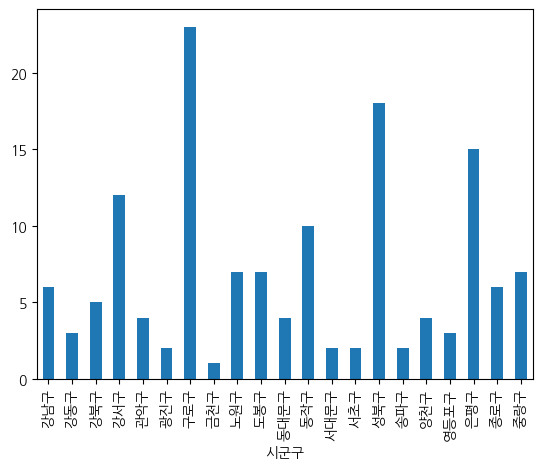

In [56]:
#구별 스쿨존 내 어린이 사고 발생건수
df3.plot.bar()

<Axes: xlabel='시군구'>

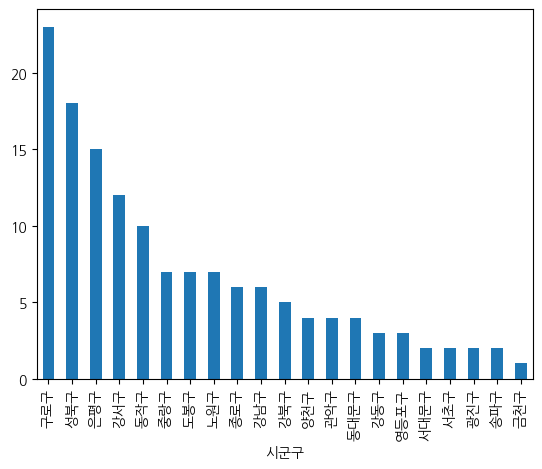

In [72]:
#구별 스쿨존 내 어린이 사고 발생건수 내림차순
df4.sort_values(ascending=False).plot.bar()

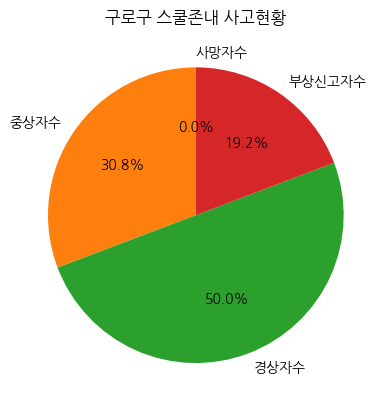

In [89]:
# CCTV 개수가 가장 적은 구로구 어린이 스쿨존 내 교통사고
# 발생건수,사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수

guro_pie = df3.loc['구로구',['사망자수', '중상자수', '경상자수', '부상신고자수']]

#파이차트

plt.pie(guro_pie, labels=guro_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('구로구 스쿨존내 어린이 사고현황')
plt.show()

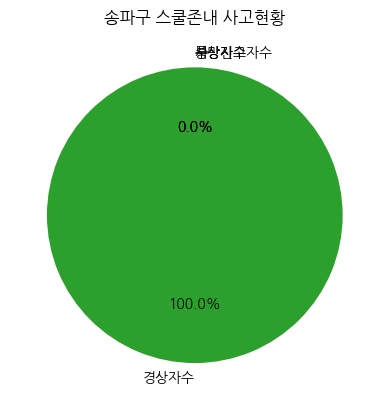

In [90]:
# CCTV 개수가 가장 적은 송파구 어린이 스쿨존 내 교통사고
# 발생건수,사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수

guro_pie = df3.loc['송파구',['사망자수', '중상자수', '경상자수', '부상신고자수']]

#파이차트

plt.pie(guro_pie, labels=guro_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('송파구 스쿨존내 어린이 사고현황')
plt.show()

In [77]:
df3

,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수
시군구,,,,,,
강남구,6,6,0,2,4,0
강동구,3,3,1,1,1,0
강북구,5,5,0,1,4,0
강서구,12,12,1,2,7,2
관악구,4,4,2,1,1,0
광진구,2,2,0,0,2,0
구로구,23,26,0,8,13,5
금천구,1,1,1,0,0,0
노원구,7,13,2,5,5,1


In [91]:
center = [37.5502, 126.982]

# folium
map = folium.Map(location=center, zoom_start=11)

# 각 데이터 포인트마다 지도에 마커를 추가합니다
for idx, row in df2.iterrows():
    lon, lat = row['경도'], row['위도']
    # 마커
    marker = folium.Marker(location=[lat, lon])
    # 맵에 마커를 추가
    marker.add_to(map)

map

In [92]:
# 스쿨존내 어린이 사고 다발지역 위치를  Marker로 표시
for name, lat, lng in zip(df2.지점명, df2.위도, df2.경도):
    folium.Marker([lat, lng], popup=name).add_to(map)
map